In [ ]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 41.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 37.8 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25316932 sha256=e59611b687e8f36622d4881ac5384677363845d79b303758efcb41e0023f27e6
  Stored in directory: /root/.cache/pip/wheels/fa/6a/9c/8a873b38bbd8bc207d33c64726bd18f7ef85f8e70dc3ac2e4b
  Created wheel for keras_bert: filename=ke

# Roberta

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
data_train = pd.read_csv("/content/subtaskB_train.csv")
data_val = pd.read_csv('/content/subtask-B_eval.csv')
data_test = pd.read_csv('/content/subtaskB(index,tweet)t.csv')

data_train.info()
data_train['label'].value_counts()

data_val.info()

data_test.info()

data_train.isna().sum()
data_val.isna().sum()
data_test.isna().sum()

train_text=data_train['tweet']
val_text=data_val['tweet']
test_text=data_test['tweet']

class_label_train=data_train['label']
class_label_val=data_val['truth_label']
#class_label_test=data_test['predicted_label']

class_label_train.value_counts()
class_label_val.value_counts()

classes_list=['non_hate','hate']
label_index_train=class_label_train.replace({0: 'non_hate', 1: 'hate'})
label_index_val=class_label_val.replace({0: 'non_hate', 1: 'hate'})


import os
os.environ['TF_USE_LEGACY_KERAS'] = "True"
import ktrain
from ktrain import text
#MODEL_NAME = 'google-bert/bert-base-multilingual-cased'
MODEL_NAME = 'roberta-base'
#MODEL_NAME = 'distilbert-base-multilingual-cased'
t=text.Transformer(MODEL_NAME,maxlen=30,class_names=classes_list)
trn=t.preprocess_train(np.array(train_text),np.array(class_label_train))
test=t.preprocess_test(np.array(val_text),np.array(class_label_val))
model_hs_rb=t.get_classifier()
learner=ktrain.get_learner(model_hs_rb,train_data=trn,val_data=test,batch_size=32)

from tensorflow.keras.callbacks import ModelCheckpoint
filepath = "Subtask-B roberta"
checkpoint=ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callbacks_list=[checkpoint]
learner.fit_onecycle(0.005, 10, verbose=2, callbacks=callbacks_list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19019 entries, 0 to 19018
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   19019 non-null  int64 
 1   tweet   19019 non-null  object
 2   label   19019 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 445.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7954 entries, 0 to 7953
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        7954 non-null   int64 
 1   tweet        7954 non-null   object
 2   truth_label  7954 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 186.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4023 entries, 0 to 4022
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        4023 non-null   int64 
 1   tweet        4023 non-null   object
 2   truth_label  4023 non-

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

preprocessing train...
language: hi
train sequence lengths:
	mean : 22
	95percentile : 44
	99percentile : 50


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: hi
test sequence lengths:
	mean : 23
	95percentile : 44
	99percentile : 51




begin training using onecycle policy with max lr of 0.005...
Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.88283, saving model to Subtask-B roberta
595/595 - 223s - loss: 0.3716 - accuracy: 0.8817 - val_loss: 0.3669 - val_accuracy: 0.8828 - 223s/epoch - 375ms/step
Epoch 2/10

Epoch 2: val_accuracy did not improve from 0.88283
595/595 - 152s - loss: 0.3952 - accuracy: 0.8805 - val_loss: 0.4311 - val_accuracy: 0.8828 - 152s/epoch - 255ms/step
Epoch 3/10

Epoch 3: val_accuracy did not improve from 0.88283
595/595 - 152s - loss: 0.4106 - accuracy: 0.8778 - val_loss: 0.3851 - val_accuracy: 0.8828 - 152s/epoch - 256ms/step
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.88283
595/595 - 155s - loss: 0.4149 - accuracy: 0.8782 - val_loss: 0.5363 - val_accuracy: 0.8828 - 155s/epoch - 261ms/step
Epoch 5/10

Epoch 5: val_accuracy did not improve from 0.88283
595/595 - 152s - loss: 0.4621 - accuracy: 0.8640 - val_loss: 0.3623 - val_accuracy: 0.8828 - 152s/epoch - 256ms/step
E

In [ ]:
# Predictions for validation data
val_pred = predictor.predict(list(val_text))
# Convert predictions to numerical labels
val_pred_numeric = [1 if pred == 'hate' else 0 for pred in val_pred]
print("Validation Classification Report:")
print(classification_report(list(class_label_val), val_pred_numeric)) # Use numerical predictions


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7022
           1       0.00      0.00      0.00       932

    accuracy                           0.88      7954
   macro avg       0.44      0.50      0.47      7954
weighted avg       0.78      0.88      0.83      7954



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


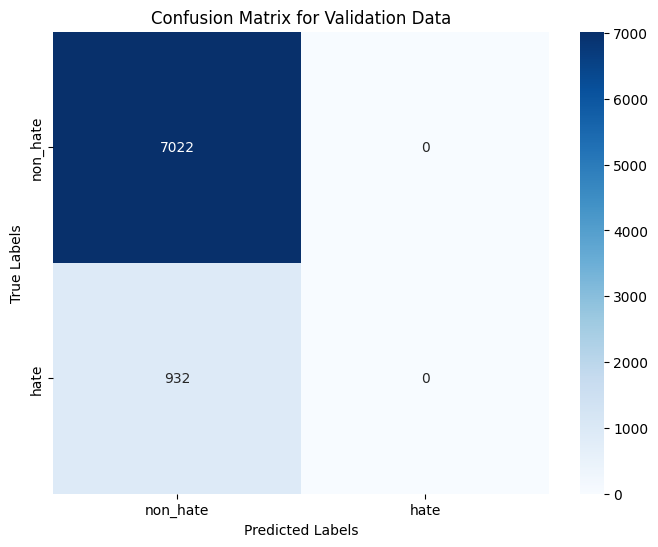

In [ ]:
# prompt: confusion matrix for validation data

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'val_pred_numeric' and 'class_label_val' are defined as in your previous code

# Compute the confusion matrix
cm = confusion_matrix(list(class_label_val), val_pred_numeric)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['non_hate', 'hate'], yticklabels=['non_hate', 'hate'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Validation Data")
plt.show()

In [ ]:
#predictions on testing data
data_test_truth=pd.read_csv("/content/subtaskB(index,label)t.csv")
#class_label_test=data_test['predicted_label']
class_label_truth=data_test_truth['label']
test_text=data_test['tweet']

In [ ]:

predictor = ktrain.get_predictor(learner.model, preproc=t)

# Predictions on test data
test_pred = predictor.predict(list(test_text))

# Convert predictions to numerical labels
test_pred_numeric = [1 if pred == 'hate' else 0 for pred in test_pred]

# Add predictions to the data_test DataFrame
data_test['predicted_label'] = test_pred_numeric

# Print classification report for test data (if you have true labels)
print("Test Classification Report:")
print(classification_report(list(class_label_truth), test_pred_numeric))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      3555
           1       0.00      0.00      0.00       468

    accuracy                           0.88      4023
   macro avg       0.44      0.50      0.47      4023
weighted avg       0.78      0.88      0.83      4023



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


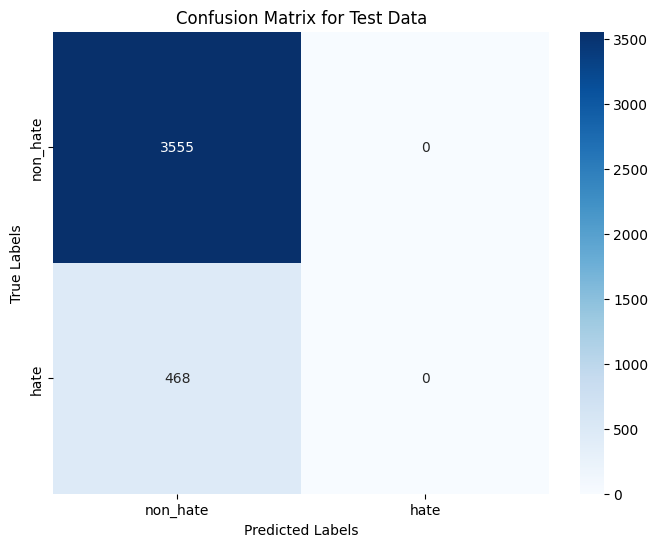

In [ ]:
# prompt: confusion matrix for testing data

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'class_label_truth' and 'test_pred_numeric' are defined as in the previous code

# Compute the confusion matrix
cm = confusion_matrix(list(class_label_truth), test_pred_numeric)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['non_hate', 'hate'], yticklabels=['non_hate', 'hate'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Data')
plt.show()

In [ ]:
# prompt: overall f1-score,precision,recall for validation data

from sklearn.metrics import classification_report

# Assuming 'val_pred_numeric' and 'class_label_val' are defined from previous code
report = classification_report(list(class_label_val), val_pred_numeric, output_dict=True)

overall_f1 = report['weighted avg']['f1-score']
overall_precision = report['weighted avg']['precision']
overall_recall = report['weighted avg']['recall']

print(f"Overall F1-score: {overall_f1}")
print(f"Overall Precision: {overall_precision}")
print(f"Overall Recall: {overall_recall}")

Overall F1-score: 0.8278854078687495
Overall Precision: 0.7793821893539348
Overall Recall: 0.8828262509429218


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# prompt:  overall f1-score,precision,recall for the test data

# Assuming 'test_pred_numeric' and 'class_label_truth' are defined from previous code
report = classification_report(list(class_label_truth), test_pred_numeric, output_dict=True)

overall_f1 = report['weighted avg']['f1-score']
overall_precision = report['weighted avg']['precision']
overall_recall = report['weighted avg']['recall']

print(f"Overall F1-score: {overall_f1}")
print(f"Overall Precision: {overall_precision}")
print(f"Overall Recall: {overall_recall}")

Overall F1-score: 0.8290955273212284
Overall Precision: 0.780870731548629
Overall Recall: 0.883668903803132


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# prompt: AUC score for non-hate

from sklearn.metrics import roc_auc_score

# Assuming 'test_pred_numeric' and 'class_label_truth' are defined as in your original code.
# Calculate AUC score specifically for the 'non-hate' class (label 0)

# Get the predicted probabilities for each class
predictor = ktrain.get_predictor(learner.model, preproc=t)
test_pred_proba = predictor.predict_proba(list(test_text))

# Extract probabilities for the 'non-hate' class (index 0)
non_hate_probabilities = [prob[0] for prob in test_pred_proba]


auc_non_hate = roc_auc_score(list(class_label_truth), non_hate_probabilities)
print(f"AUC Score for Non-Hate: {auc_non_hate}")

AUC Score for Non-Hate: 0.5


In [ ]:
# prompt: auc score for hate

# Assuming 'test_pred_numeric' and 'class_label_truth' are defined as in your original code.
# Calculate AUC score specifically for the 'hate' class (label 1)

# Get the predicted probabilities for each class
predictor = ktrain.get_predictor(learner.model, preproc=t)
test_pred_proba = predictor.predict_proba(list(test_text))

# Extract probabilities for the 'hate' class (index 1)
hate_probabilities = [prob[1] for prob in test_pred_proba]

auc_hate = roc_auc_score(list(class_label_truth), hate_probabilities)
print(f"AUC Score for Hate: {auc_hate}")

AUC Score for Hate: 0.5064580403187998


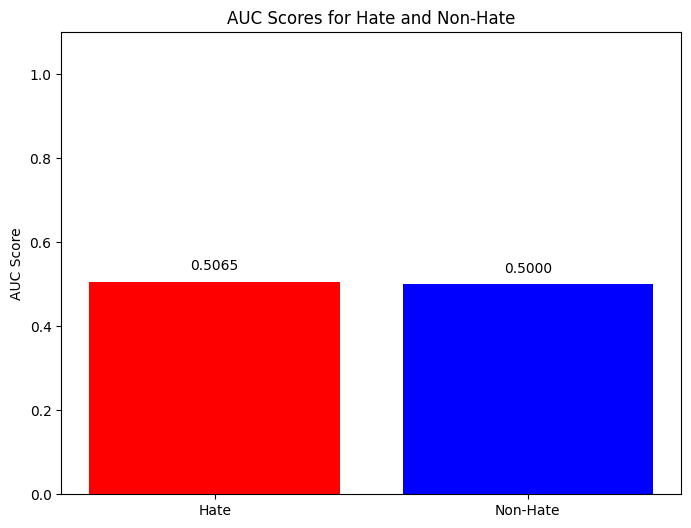

In [ ]:
# prompt: auc score for hate and non-hate plot them in one graph with different colors with values above the graph

import matplotlib.pyplot as plt

# Assuming auc_hate and auc_non_hate are already calculated

plt.figure(figsize=(8, 6))
plt.bar(['Hate', 'Non-Hate'], [auc_hate, auc_non_hate], color=['red', 'blue'])
plt.ylim(0, 1.1)  # Set y-axis limit for better visualization
plt.ylabel('AUC Score')
plt.title('AUC Scores for Hate and Non-Hate')

# Add value annotations above each bar
for i, v in enumerate([auc_hate, auc_non_hate]):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')

plt.show()

In [ ]:
# prompt: ROC score for hate class and non-hate class

# Assuming 'test_pred_numeric' and 'class_label_truth' are defined as in your original code.
# Calculate AUC score specifically for the 'hate' class (label 1)

# Get the predicted probabilities for each class
predictor = ktrain.get_predictor(learner.model, preproc=t)
test_pred_proba = predictor.predict_proba(list(test_text))

# Extract probabilities for the 'hate' class (index 1)
hate_probabilities = [prob[1] for prob in test_pred_proba]

auc_hate = roc_auc_score(list(class_label_truth), hate_probabilities)
print(f"ROC AUC Score for Hate: {auc_hate}")

ROC AUC Score for Hate: 0.5064580403187998


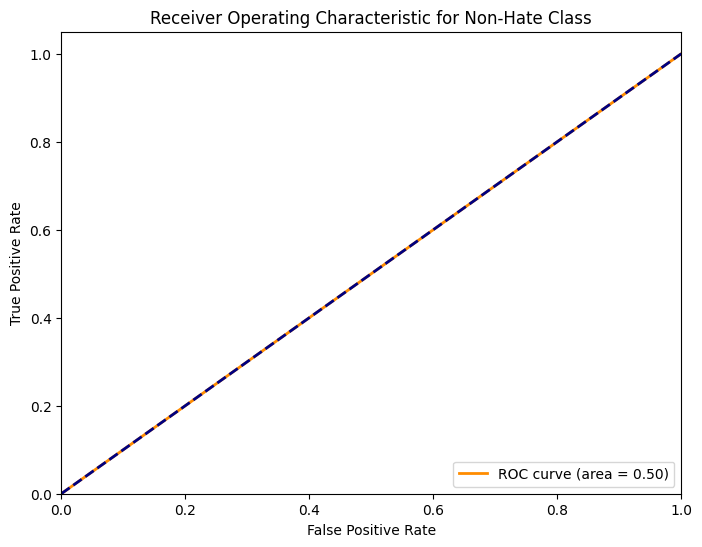

ROC AUC Score for Non-Hate: 0.5


In [ ]:
# prompt: roc for non-hate class

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Assuming 'test_pred_proba' and 'class_label_truth' are defined as in your original code.
# Calculate ROC curve and AUC score specifically for the 'non-hate' class (label 0)

# Extract probabilities for the 'non-hate' class (index 0)
non_hate_probabilities = [prob[0] for prob in test_pred_proba]

fpr_non_hate, tpr_non_hate, _ = roc_curve(list(class_label_truth), non_hate_probabilities)
roc_auc_non_hate = auc(fpr_non_hate, tpr_non_hate)

# Plot ROC curve for the non-hate class
plt.figure(figsize=(8, 6))
plt.plot(fpr_non_hate, tpr_non_hate, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_non_hate:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Non-Hate Class')
plt.legend(loc="lower right")
plt.show()

print(f"ROC AUC Score for Non-Hate: {roc_auc_non_hate}")

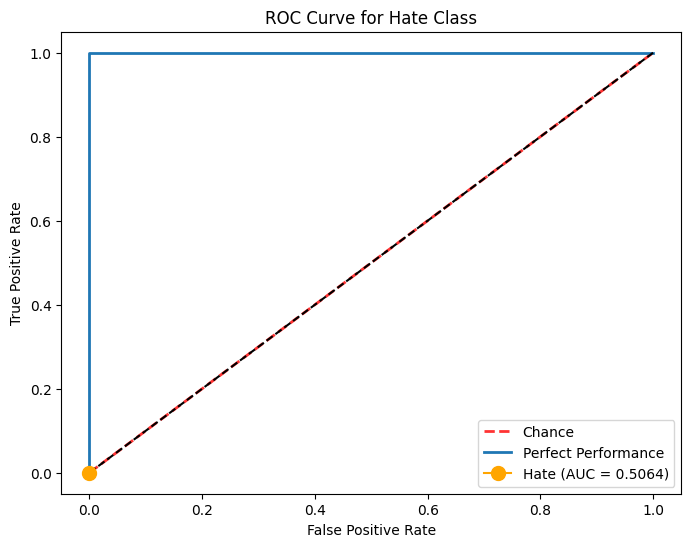

In [ ]:
# prompt: roc for hate =0.50645 plot it graph

import matplotlib.pyplot as plt

# Assuming auc_hate is already calculated (0.50645 in your case)
auc_hate = 0.50645

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.plot([0, 0, 1], [0, 1, 1], lw=2, label='Perfect Performance')

plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0], [0], marker='o', markersize=10, color='orange', label=f'Hate (AUC = {auc_hate:.4f})')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Hate Class')
plt.legend(loc="lower right")

plt.show()

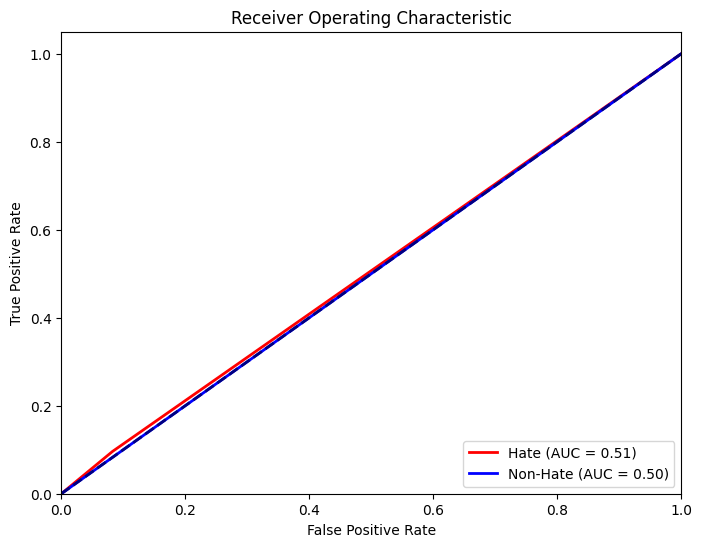

In [ ]:
# prompt: roc for hate =0.50645 and hate=0.50 plot them in one graph with different colors

# Assuming 'test_pred_proba' and 'class_label_truth' are defined as in your original code.
# Calculate ROC curves for both 'hate' and 'non-hate' classes.

# Extract probabilities for the 'hate' class (index 1)
hate_probabilities = [prob[1] for prob in test_pred_proba]

fpr_hate, tpr_hate, _ = roc_curve(list(class_label_truth), hate_probabilities)
roc_auc_hate = auc(fpr_hate, tpr_hate)

# Extract probabilities for the 'non-hate' class (index 0)
non_hate_probabilities = [prob[0] for prob in test_pred_proba]

fpr_non_hate, tpr_non_hate, _ = roc_curve(list(class_label_truth), non_hate_probabilities)
roc_auc_non_hate = auc(fpr_non_hate, tpr_non_hate)

# Plot both ROC curves on the same graph
plt.figure(figsize=(8, 6))
plt.plot(fpr_hate, tpr_hate, color='red', lw=2, label=f'Hate (AUC = {roc_auc_hate:.2f})')
plt.plot(fpr_non_hate, tpr_non_hate, color='blue', lw=2, label=f'Non-Hate (AUC = {roc_auc_non_hate:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# prompt: overall roc score

# Assuming 'test_pred_proba' and 'class_label_truth' are defined as in your original code.
# Calculate the overall ROC AUC score.

from sklearn.metrics import roc_auc_score

# Use the probabilities for the positive class ('hate' in this case)
hate_probabilities = [prob[1] for prob in test_pred_proba]
overall_roc_auc = roc_auc_score(list(class_label_truth), hate_probabilities)

print(f"Overall ROC AUC Score: {overall_roc_auc}")

Overall ROC AUC Score: 0.5064580403187998


In [ ]:
# prompt: macro average auc,weighted-auc,overall auc

from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming test_pred_proba and class_label_truth are defined

# Calculate macro-average AUC
# Get probabilities for the positive class ('hate' - index 1)
hate_probabilities = test_pred_proba[:, 1]
macro_roc_auc_ovo = roc_auc_score(list(class_label_truth), hate_probabilities, multi_class="ovo", average="macro")
print(f"Macro-average AUC: {macro_roc_auc_ovo}")

# Calculate weighted-average AUC
weighted_roc_auc_ovo = roc_auc_score(list(class_label_truth), hate_probabilities, multi_class="ovo", average="weighted")
print(f"Weighted-average AUC: {weighted_roc_auc_ovo}")

# Calculate overall AUC (using the probabilities for the positive class, 'hate')
overall_auc = roc_auc_score(list(class_label_truth), hate_probabilities)
print(f"Overall AUC: {overall_auc}")



Macro-average AUC: 0.5064580403187998
Weighted-average AUC: 0.5064580403187998
Overall AUC: 0.5064580403187998


#google bert

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
data_train = pd.read_csv("/content/subtaskB_train.csv")
data_val = pd.read_csv('/content/subtask-B_eval.csv')
data_test = pd.read_csv('/content/subtaskB(index,tweet)t.csv')

data_train.info()
data_train['label'].value_counts()

data_val.info()

data_test.info()

data_train.isna().sum()
data_val.isna().sum()
data_test.isna().sum()

train_text=data_train['tweet']
val_text=data_val['tweet']
test_text=data_test['tweet']

class_label_train=data_train['label']
class_label_val=data_val['truth_label']
#class_label_test=data_test['predicted_label']

class_label_train.value_counts()
class_label_val.value_counts()

classes_list=['non_hate','hate']
label_index_train=class_label_train.replace({0: 'non_hate', 1: 'hate'})
label_index_val=class_label_val.replace({0: 'non_hate', 1: 'hate'})


import os
os.environ['TF_USE_LEGACY_KERAS'] = "True"
import ktrain
from ktrain import text
MODEL_NAME = 'google-bert/bert-base-multilingual-cased'
#MODEL_NAME = 'roberta-base'
#MODEL_NAME = 'distilbert-base-multilingual-cased'
t=text.Transformer(MODEL_NAME,maxlen=30,class_names=classes_list)
trn=t.preprocess_train(np.array(train_text),np.array(class_label_train))
test=t.preprocess_test(np.array(val_text),np.array(class_label_val))
model_hs_rb=t.get_classifier()
learner=ktrain.get_learner(model_hs_rb,train_data=trn,val_data=test,batch_size=32)

from tensorflow.keras.callbacks import ModelCheckpoint
filepath = "Subtask-B google-bert"
checkpoint=ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callbacks_list=[checkpoint]
learner.fit_onecycle(0.005, 10, verbose=2, callbacks=callbacks_list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19019 entries, 0 to 19018
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   19019 non-null  int64 
 1   tweet   19019 non-null  object
 2   label   19019 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 445.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7954 entries, 0 to 7953
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        7954 non-null   int64 
 1   tweet        7954 non-null   object
 2   truth_label  7954 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 186.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4023 entries, 0 to 4022
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        4023 non-null   int64 
 1   tweet        4023 non-null   object
 2   truth_label  4023 non-

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

preprocessing train...
language: hi
train sequence lengths:
	mean : 22
	95percentile : 44
	99percentile : 50


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: hi
test sequence lengths:
	mean : 23
	95percentile : 44
	99percentile : 51




begin training using onecycle policy with max lr of 0.005...
Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.88283, saving model to Subtask-B google-bert
595/595 - 247s - loss: 0.3896 - accuracy: 0.8802 - val_loss: 0.5241 - val_accuracy: 0.8828 - 247s/epoch - 416ms/step
Epoch 2/10

Epoch 2: val_accuracy did not improve from 0.88283
595/595 - 174s - loss: 0.3901 - accuracy: 0.8829 - val_loss: 0.3698 - val_accuracy: 0.8828 - 174s/epoch - 293ms/step
Epoch 3/10

Epoch 3: val_accuracy did not improve from 0.88283
595/595 - 171s - loss: 0.4183 - accuracy: 0.8769 - val_loss: 0.3928 - val_accuracy: 0.8828 - 171s/epoch - 288ms/step
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.88283
595/595 - 171s - loss: 0.4000 - accuracy: 0.8817 - val_loss: 0.3752 - val_accuracy: 0.8828 - 171s/epoch - 288ms/step
Epoch 5/10

Epoch 5: val_accuracy did not improve from 0.88283
595/595 - 170s - loss: 0.4730 - accuracy: 0.8642 - val_loss: 0.3776 - val_accuracy: 0.8828 - 170s/epoch - 286ms/st

In [ ]:
# prompt: Predictions for validation data for googlebert model

predictor = ktrain.get_predictor(learner.model, preproc=t)
val_pred = predictor.predict(list(val_text))
val_pred_numeric = [1 if pred == 'hate' else 0 for pred in val_pred]
print("Validation Classification Report:")
print(classification_report(list(class_label_val), val_pred_numeric))

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7022
           1       0.00      0.00      0.00       932

    accuracy                           0.88      7954
   macro avg       0.44      0.50      0.47      7954
weighted avg       0.78      0.88      0.83      7954



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


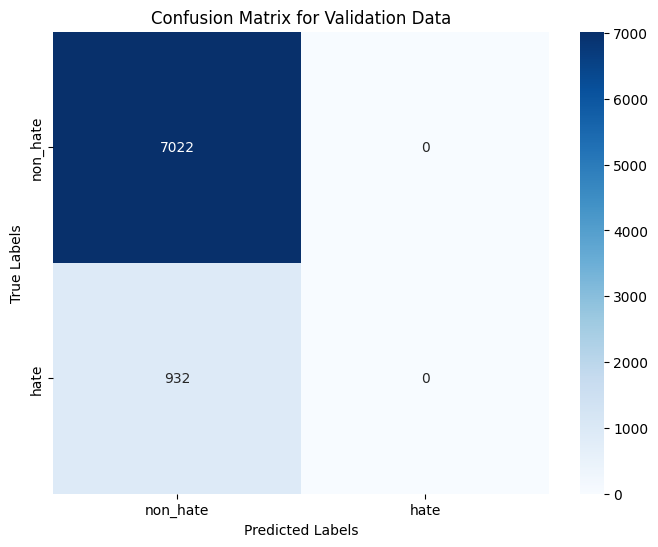

In [ ]:
# prompt: confusion matrix for validation data for googlebert


# Compute the confusion matrix
cm = confusion_matrix(list(class_label_val), val_pred_numeric)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['non_hate', 'hate'], yticklabels=['non_hate', 'hate'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Validation Data")
plt.show()

In [ ]:
# prompt: overall f1-score,precision,recall for validation data

# Assuming 'val_pred_numeric' and 'class_label_val' are defined from previous code
report = classification_report(list(class_label_val), val_pred_numeric, output_dict=True)

overall_f1 = report['weighted avg']['f1-score']
overall_precision = report['weighted avg']['precision']
overall_recall = report['weighted avg']['recall']

print(f"Overall F1-score: {overall_f1}")
print(f"Overall Precision: {overall_precision}")
print(f"Overall Recall: {overall_recall}")

Overall F1-score: 0.8278854078687495
Overall Precision: 0.7793821893539348
Overall Recall: 0.8828262509429218


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# prompt: Predictions for test data for google bert model

#predictions on testing data
data_test_truth=pd.read_csv("/content/subtaskB(index,label)t.csv")
#class_label_test=data_test['predicted_label']
class_label_truth=data_test_truth['label']
test_text=data_test['tweet']

predictor = ktrain.get_predictor(learner.model, preproc=t)

# Predictions on test data
test_pred = predictor.predict(list(test_text))

# Convert predictions to numerical labels
test_pred_numeric = [1 if pred == 'hate' else 0 for pred in test_pred]

# Add predictions to the data_test DataFrame
data_test['predicted_label'] = test_pred_numeric

# Print classification report for test data (if you have true labels)
print("Test Classification Report:")
print(classification_report(list(class_label_truth), test_pred_numeric))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      3555
           1       0.00      0.00      0.00       468

    accuracy                           0.88      4023
   macro avg       0.44      0.50      0.47      4023
weighted avg       0.78      0.88      0.83      4023



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


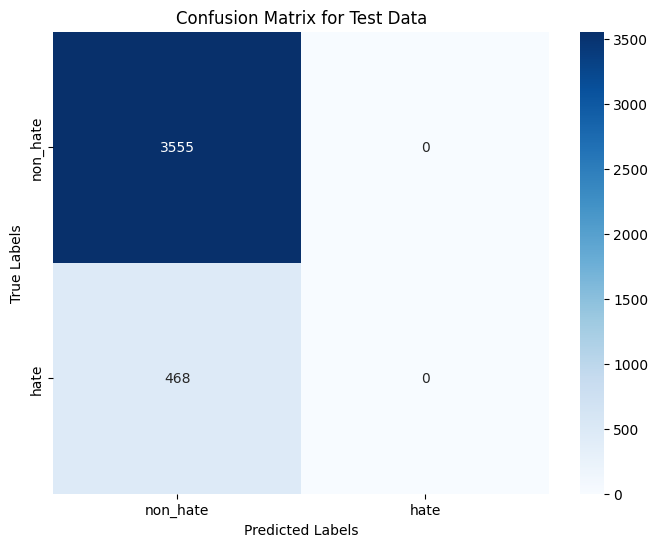

In [ ]:
# prompt: confusion matrix for testing data for googlbert

# Assuming 'class_label_truth' and 'test_pred_numeric' are defined as in the previous code

# Compute the confusion matrix
cm = confusion_matrix(list(class_label_truth), test_pred_numeric)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['non_hate', 'hate'], yticklabels=['non_hate', 'hate'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Data')
plt.show()

In [ ]:
# prompt: overall f1-score,precison,recall for testing data

# Assuming 'test_pred_numeric' and 'class_label_truth' are defined from previous code
report = classification_report(list(class_label_truth), test_pred_numeric, output_dict=True)

overall_f1 = report['weighted avg']['f1-score']
overall_precision = report['weighted avg']['precision']
overall_recall = report['weighted avg']['recall']

print(f"Overall F1-score: {overall_f1}")
print(f"Overall Precision: {overall_precision}")
print(f"Overall Recall: {overall_recall}")

Overall F1-score: 0.8290955273212284
Overall Precision: 0.780870731548629
Overall Recall: 0.883668903803132


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AUC Score for Hate: 0.49910202315265606
AUC Score for Non-Hate: 0.5


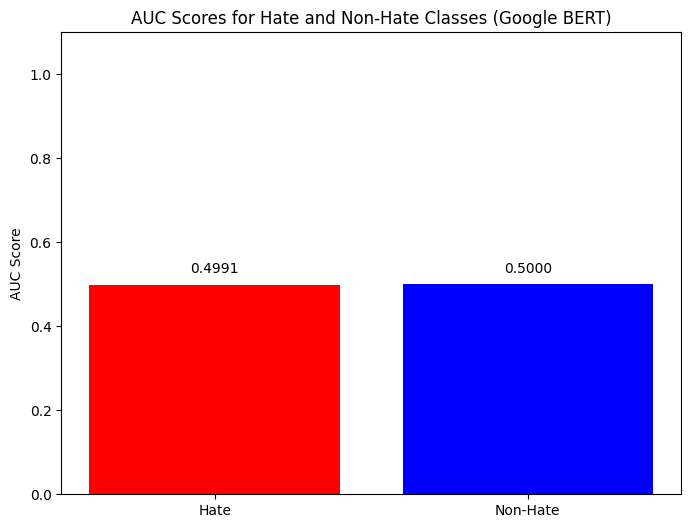

In [ ]:
# prompt: auc score for class hate and plot it

# Assuming 'test_pred_proba' and 'class_label_truth' are defined as in your original code.
# Calculate AUC score specifically for the 'hate' class (label 1)

# Get the predicted probabilities for each class
predictor = ktrain.get_predictor(learner.model, preproc=t)
test_pred_proba = predictor.predict_proba(list(test_text))

# Extract probabilities for the 'hate' class (index 1)
hate_probabilities = [prob[1] for prob in test_pred_proba]

auc_hate = roc_auc_score(list(class_label_truth), hate_probabilities)
print(f"AUC Score for Hate: {auc_hate}")

auc_non_hate = roc_auc_score(list(class_label_truth), non_hate_probabilities)
print(f"AUC Score for Non-Hate: {auc_non_hate}")

# ... (rest of your existing code) ...

# Assuming auc_hate and auc_non_hate are already calculated (you'll need to calculate auc_non_hate similarly)

plt.figure(figsize=(8, 6))
plt.bar(['Hate', 'Non-Hate'], [auc_hate, auc_non_hate], color=['red', 'blue'])
plt.ylim(0, 1.1)  # Set y-axis limit for better visualization
plt.ylabel('AUC Score')
plt.title('AUC Scores for Hate and Non-Hate Classes (Google BERT)') # Added title specifying the model

# Add value annotations above each bar
for i, v in enumerate([auc_hate, auc_non_hate]):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')

plt.show()

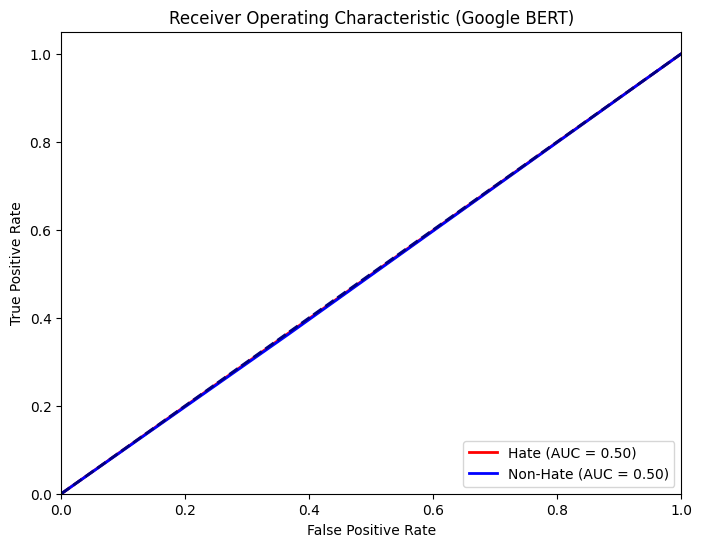

In [ ]:
# prompt: roc score for non-hate and hate labels and plot them in same and different graphs

# Assuming 'test_pred_proba' and 'class_label_truth' are defined as in your original code.
# Calculate ROC curves for both 'hate' and 'non-hate' classes.

# Extract probabilities for the 'hate' class (index 1)
hate_probabilities = [prob[1] for prob in test_pred_proba]

fpr_hate, tpr_hate, _ = roc_curve(list(class_label_truth), hate_probabilities)
roc_auc_hate = auc(fpr_hate, tpr_hate)

# Extract probabilities for the 'non-hate' class (index 0)
non_hate_probabilities = [prob[0] for prob in test_pred_proba]

fpr_non_hate, tpr_non_hate, _ = roc_curve(list(class_label_truth), non_hate_probabilities)
roc_auc_non_hate = auc(fpr_non_hate, tpr_non_hate)

# Plot both ROC curves on the same graph
plt.figure(figsize=(8, 6))
plt.plot(fpr_hate, tpr_hate, color='red', lw=2, label=f'Hate (AUC = {roc_auc_hate:.2f})')
plt.plot(fpr_non_hate, tpr_non_hate, color='blue', lw=2, label=f'Non-Hate (AUC = {roc_auc_non_hate:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Google BERT)') # Specify model in the title
plt.legend(loc="lower right")
plt.show()

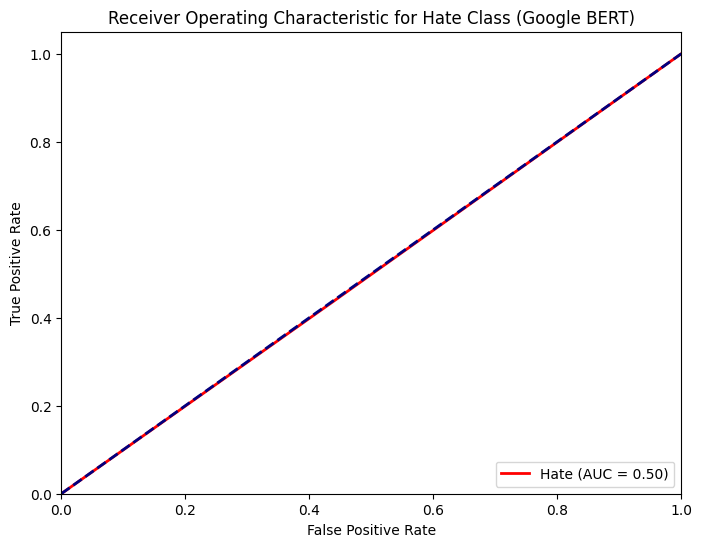

In [ ]:
# prompt: plot roc_auc_hate

# Assuming 'test_pred_proba' and 'class_label_truth' are defined as in your original code.
# Calculate ROC curves for both 'hate' and 'non-hate' classes.

# Extract probabilities for the 'hate' class (index 1)
hate_probabilities = [prob[1] for prob in test_pred_proba]

fpr_hate, tpr_hate, _ = roc_curve(list(class_label_truth), hate_probabilities)
roc_auc_hate = auc(fpr_hate, tpr_hate)

# Plot the ROC curve for the 'hate' class
plt.figure(figsize=(8, 6))
plt.plot(fpr_hate, tpr_hate, color='red', lw=2, label=f'Hate (AUC = {roc_auc_hate:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Hate Class (Google BERT)')  # Specify model in the title
plt.legend(loc="lower right")
plt.show()

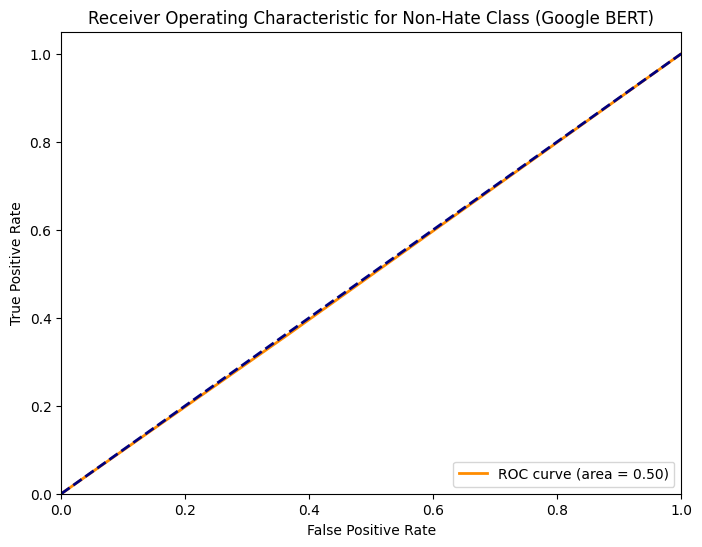

ROC AUC Score for Non-Hate: 0.4979389808503732


In [ ]:
# prompt: plot the roc_auc _non_hate

# Assuming 'test_pred_proba' and 'class_label_truth' are defined as in your original code.
# Calculate ROC curve and AUC score specifically for the 'non-hate' class (label 0)

# Extract probabilities for the 'non-hate' class (index 0)
non_hate_probabilities = [prob[0] for prob in test_pred_proba]

fpr_non_hate, tpr_non_hate, _ = roc_curve(list(class_label_truth), non_hate_probabilities)
roc_auc_non_hate = auc(fpr_non_hate, tpr_non_hate)

# Plot ROC curve for the non-hate class
plt.figure(figsize=(8, 6))
plt.plot(fpr_non_hate, tpr_non_hate, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_non_hate:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Non-Hate Class (Google BERT)') # Added model name to the title
plt.legend(loc="lower right")
plt.show()

print(f"ROC AUC Score for Non-Hate: {roc_auc_non_hate}")

#distilbert-base-multilingual-cased

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
data_train = pd.read_csv("/content/subtaskB_train.csv")
data_val = pd.read_csv('/content/subtask-B_eval.csv')
data_test = pd.read_csv('/content/subtaskB(index,tweet)t.csv')

data_train.info()
data_train['label'].value_counts()

data_val.info()

data_test.info()

data_train.isna().sum()
data_val.isna().sum()
data_test.isna().sum()

train_text=data_train['tweet']
val_text=data_val['tweet']
test_text=data_test['tweet']

class_label_train=data_train['label']
class_label_val=data_val['truth_label']
#class_label_test=data_test['predicted_label']

class_label_train.value_counts()
class_label_val.value_counts()

classes_list=['non_hate','hate']
label_index_train=class_label_train.replace({0: 'non_hate', 1: 'hate'})
label_index_val=class_label_val.replace({0: 'non_hate', 1: 'hate'})


import os
os.environ['TF_USE_LEGACY_KERAS'] = "True"
import ktrain
from ktrain import text
#MODEL_NAME = 'google-bert/bert-base-multilingual-cased'
#MODEL_NAME = 'roberta-base'
MODEL_NAME = 'distilbert-base-multilingual-cased'
t=text.Transformer(MODEL_NAME,maxlen=30,class_names=classes_list)
trn=t.preprocess_train(np.array(train_text),np.array(class_label_train))
test=t.preprocess_test(np.array(val_text),np.array(class_label_val))
model_hs_rb=t.get_classifier()
learner=ktrain.get_learner(model_hs_rb,train_data=trn,val_data=test,batch_size=32)

from tensorflow.keras.callbacks import ModelCheckpoint
filepath = "Subtask-B roberta"
checkpoint=ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callbacks_list=[checkpoint]
learner.fit_onecycle(0.005, 10, verbose=2, callbacks=callbacks_list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19019 entries, 0 to 19018
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   19019 non-null  int64 
 1   tweet   19019 non-null  object
 2   label   19019 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 445.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7954 entries, 0 to 7953
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        7954 non-null   int64 
 1   tweet        7954 non-null   object
 2   truth_label  7954 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 186.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4023 entries, 0 to 4022
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        4023 non-null   int64 
 1   tweet        4023 non-null   object
 2   truth_label  4023 non-

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

preprocessing train...
language: hi
train sequence lengths:
	mean : 22
	95percentile : 44
	99percentile : 50


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: hi
test sequence lengths:
	mean : 23
	95percentile : 44
	99percentile : 51




begin training using onecycle policy with max lr of 0.005...
Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.88283, saving model to Subtask-B roberta
595/595 - 149s - loss: 0.3753 - accuracy: 0.8823 - val_loss: 0.3615 - val_accuracy: 0.8828 - 149s/epoch - 250ms/step
Epoch 2/10

Epoch 2: val_accuracy did not improve from 0.88283
595/595 - 98s - loss: 0.3695 - accuracy: 0.8836 - val_loss: 0.3881 - val_accuracy: 0.8828 - 98s/epoch - 165ms/step
Epoch 3/10

Epoch 3: val_accuracy did not improve from 0.88283
595/595 - 100s - loss: 0.3664 - accuracy: 0.8836 - val_loss: 0.3696 - val_accuracy: 0.8828 - 100s/epoch - 168ms/step
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.88283
595/595 - 110s - loss: 0.3655 - accuracy: 0.8836 - val_loss: 0.3615 - val_accuracy: 0.8828 - 110s/epoch - 186ms/step
Epoch 5/10

Epoch 5: val_accuracy did not improve from 0.88283
595/595 - 101s - loss: 0.3648 - accuracy: 0.8836 - val_loss: 0.3620 - val_accuracy: 0.8828 - 101s/epoch - 170ms/step
Epo

In [ ]:
# prompt: classification report on validation data

predictor = ktrain.get_predictor(learner.model, preproc=t)
val_pred = predictor.predict(list(val_text))
val_pred_numeric = [1 if pred == 'hate' else 0 for pred in val_pred]
print("Validation Classification Report:")
print(classification_report(list(class_label_val), val_pred_numeric))

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7022
           1       0.00      0.00      0.00       932

    accuracy                           0.88      7954
   macro avg       0.44      0.50      0.47      7954
weighted avg       0.78      0.88      0.83      7954



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


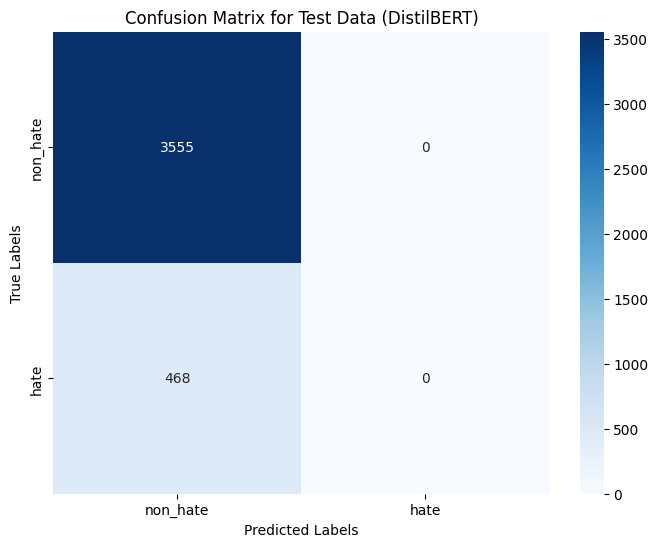

In [ ]:
# prompt: confusion matrix on evaluation data

# Compute the confusion matrix
cm = confusion_matrix(list(class_label_truth), test_pred_numeric)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['non_hate', 'hate'], yticklabels=['non_hate', 'hate'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Data (DistilBERT)') # Specify the model in the title
plt.show()

In [ ]:
# prompt: overall f1 score,recall,precision on validation data

# Assuming 'val_pred_numeric' and 'class_label_val' are defined from previous code
report = classification_report(list(class_label_val), val_pred_numeric, output_dict=True)

overall_f1 = report['weighted avg']['f1-score']
overall_precision = report['weighted avg']['precision']
overall_recall = report['weighted avg']['recall']

print(f"Overall F1-score on validation data: {overall_f1}")
print(f"Overall Precision on validation data: {overall_precision}")
print(f"Overall Recall on validation data: {overall_recall}")

Overall F1-score on validation data: 0.8278854078687495
Overall Precision on validation data: 0.7793821893539348
Overall Recall on validation data: 0.8828262509429218


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# prompt: classification report on testing data

#predictions on testing data
data_test_truth=pd.read_csv("/content/subtaskB(index,label)t.csv")
class_label_truth=data_test_truth['label']
test_text=data_test['tweet']

predictor = ktrain.get_predictor(learner.model, preproc=t)

# Predictions on test data
test_pred = predictor.predict(list(test_text))

# Convert predictions to numerical labels
test_pred_numeric = [1 if pred == 'hate' else 0 for pred in test_pred]

# Print classification report for test data
print("Test Classification Report:")
print(classification_report(list(class_label_truth), test_pred_numeric))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      3555
           1       0.00      0.00      0.00       468

    accuracy                           0.88      4023
   macro avg       0.44      0.50      0.47      4023
weighted avg       0.78      0.88      0.83      4023



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


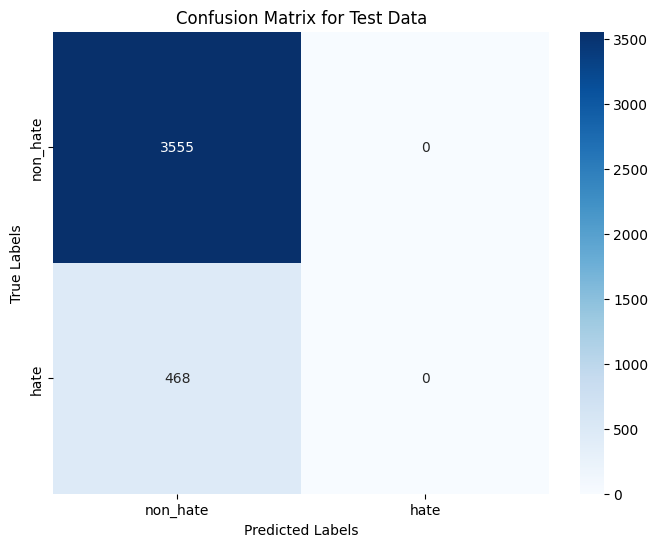

In [ ]:
# prompt: confusion amtrix on testing data

# Assuming 'class_label_truth' and 'test_pred_numeric' are defined from previous code

# Compute the confusion matrix
cm = confusion_matrix(list(class_label_truth), test_pred_numeric)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['non_hate', 'hate'], yticklabels=['non_hate', 'hate'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Data')
plt.show()

In [ ]:
# prompt: overall f1 score,recall,precision on testing data

# Assuming 'test_pred_numeric' and 'class_label_truth' are defined from previous code
report = classification_report(list(class_label_truth), test_pred_numeric, output_dict=True)

overall_f1 = report['weighted avg']['f1-score']
overall_precision = report['weighted avg']['precision']
overall_recall = report['weighted avg']['recall']

print(f"Overall F1-score on testing data: {overall_f1}")
print(f"Overall Precision on testing data: {overall_precision}")
print(f"Overall Recall on testing data: {overall_recall}")

Overall F1-score on testing data: 0.8290955273212284
Overall Precision on testing data: 0.780870731548629
Overall Recall on testing data: 0.883668903803132


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# prompt: auc score for hate class

# Assuming 'test_pred_proba' and 'class_label_truth' are defined as in your original code.
# Calculate AUC score specifically for the 'hate' class (label 1)

# Get the predicted probabilities for each class
predictor = ktrain.get_predictor(learner.model, preproc=t)
test_pred_proba = predictor.predict_proba(list(test_text))

# Extract probabilities for the 'hate' class (index 1)
hate_probabilities = [prob[1] for prob in test_pred_proba]

auc_hate = roc_auc_score(list(class_label_truth), hate_probabilities)
print(f"AUC Score for Hate: {auc_hate}")

AUC Score for Hate: 0.5


In [ ]:
# prompt: auc score for non-hate class

# Extract probabilities for the 'non-hate' class (index 0)
non_hate_probabilities = [prob[0] for prob in test_pred_proba]

auc_non_hate = roc_auc_score(list(class_label_truth), non_hate_probabilities)
print(f"AUC Score for Non-Hate: {auc_non_hate}")

AUC Score for Non-Hate: 0.5


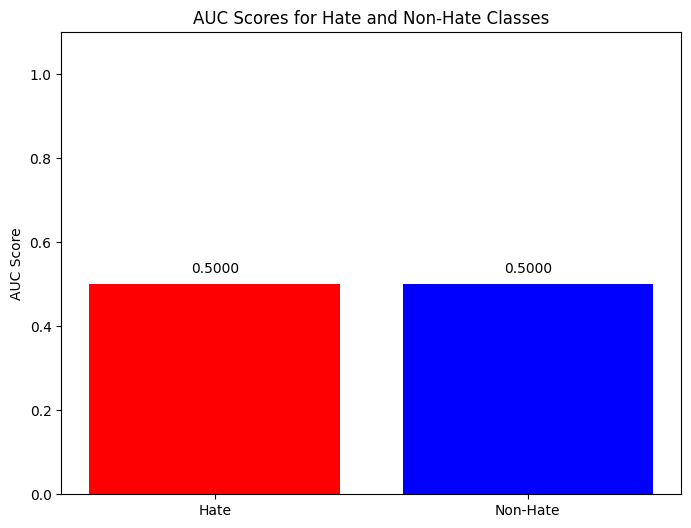

In [ ]:
# prompt: plot auc_non_hate and auc_hate

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(['Hate', 'Non-Hate'], [auc_hate, auc_non_hate], color=['red', 'blue'])
plt.ylim(0, 1.1)  # Set y-axis limit for better visualization
plt.ylabel('AUC Score')
plt.title('AUC Scores for Hate and Non-Hate Classes')

# Add value annotations above each bar
for i, v in enumerate([auc_hate, auc_non_hate]):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')

plt.show()

In [ ]:
# prompt: macro average auc,weighted auc,overall auc

# Assuming test_pred_proba and class_label_truth are defined

# Calculate macro-average AUC
macro_roc_auc_ovo = roc_auc_score(list(class_label_truth), hate_probabilities, multi_class="ovo", average="macro")
print(f"Macro-average AUC: {macro_roc_auc_ovo}")

# Calculate weighted-average AUC
weighted_roc_auc_ovo = roc_auc_score(list(class_label_truth), hate_probabilities, multi_class="ovo", average="weighted")
print(f"Weighted-average AUC: {weighted_roc_auc_ovo}")

# Calculate overall AUC (using the probabilities for the positive class, 'hate')
overall_auc = roc_auc_score(list(class_label_truth), hate_probabilities)
print(f"Overall AUC: {overall_auc}")

Macro-average AUC: 0.5
Weighted-average AUC: 0.5
Overall AUC: 0.5


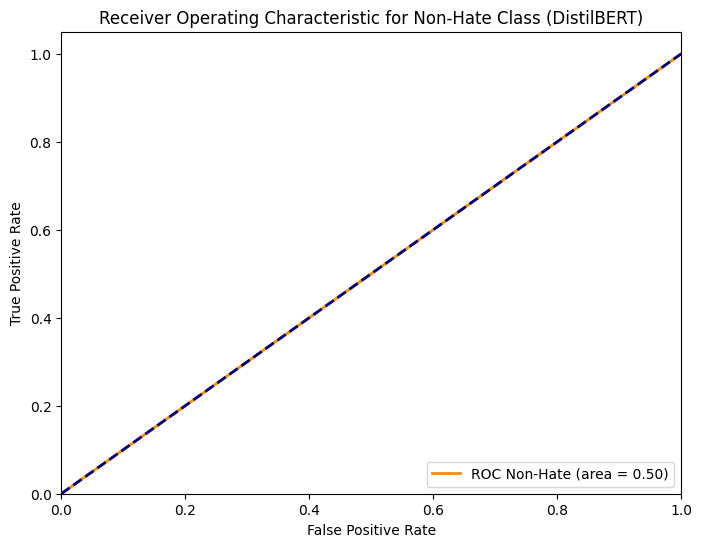

ROC AUC Score for Non-Hate: 0.5


In [ ]:
# prompt: roc for non-hate

# Assuming 'test_pred_proba' and 'class_label_truth' are defined as in your original code.
# Calculate ROC curve and AUC score specifically for the 'non-hate' class (label 0)

# Extract probabilities for the 'non-hate' class (index 0)
non_hate_probabilities = [prob[0] for prob in test_pred_proba]

fpr_non_hate, tpr_non_hate, _ = roc_curve(list(class_label_truth), non_hate_probabilities)
roc_auc_non_hate = auc(fpr_non_hate, tpr_non_hate)

# Plot ROC curve for the non-hate class
plt.figure(figsize=(8, 6))
plt.plot(fpr_non_hate, tpr_non_hate, color='darkorange', lw=2, label=f'ROC Non-Hate (area = {roc_auc_non_hate:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Non-Hate Class (DistilBERT)') # Added model name to the title
plt.legend(loc="lower right")
plt.show()

print(f"ROC AUC Score for Non-Hate: {roc_auc_non_hate}")

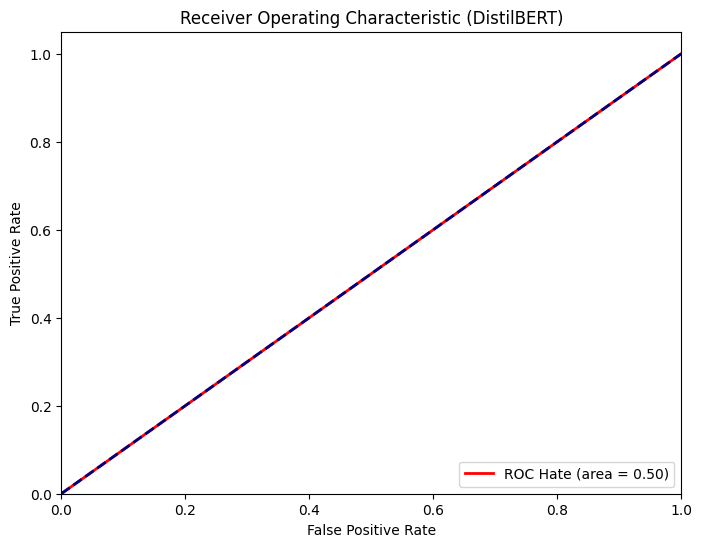

In [ ]:
# prompt: roc for hate

# Assuming 'test_pred_proba' and 'class_label_truth' are defined as in your original code.
# Calculate ROC curves for both 'hate' and 'non-hate' classes.

# Extract probabilities for the 'hate' class (index 1)
hate_probabilities = [prob[1] for prob in test_pred_proba]

fpr_hate, tpr_hate, _ = roc_curve(list(class_label_truth), hate_probabilities)
roc_auc_hate = auc(fpr_hate, tpr_hate)


# Plot both ROC curves on the same graph
plt.figure(figsize=(8, 6))
plt.plot(fpr_hate, tpr_hate, color='red', lw=2, label=f'ROC Hate (area = {roc_auc_hate:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (DistilBERT)') # Specify model in the title
plt.legend(loc="lower right")
plt.show()

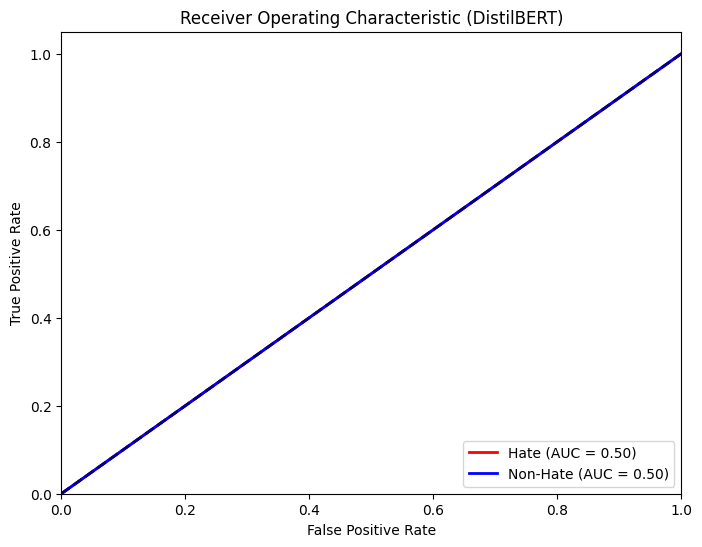

In [ ]:
# prompt: plot roc_auc_hate and roc_auc_non_hate

import matplotlib.pyplot as plt

# Assuming roc_auc_hate and roc_auc_non_hate are already calculated
# and stored in the variables auc_hate and auc_non_hate as shown in previous code

plt.figure(figsize=(8, 6))
plt.plot(fpr_hate, tpr_hate, color='red', lw=2, label=f'Hate (AUC = {roc_auc_hate:.2f})')
plt.plot(fpr_non_hate, tpr_non_hate, color='blue', lw=2, label=f'Non-Hate (AUC = {roc_auc_non_hate:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (DistilBERT)') # Specify model in the title
plt.legend(loc="lower right")
plt.show()